**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded on scale of 0-4 scale, following the standard NJIT convention (A: 4, B+: 3.5, B: 3, C+: 2.5, C: 2, D: 1, F: 0).

The total score must be re-scaled to 100 so that Canvas gives the same weight to Assignments 2-6.

For questions stated as being worth 8 points, grade on a 0-4 scale, and multiply by 2.

# **Assignment 2**

This assignment walks you through the basics of the perceptron. You will also do some first experiments on a toy data set, and check the effect of hyperparameters. The intended goal of the assignment is to familiarize you further with the Jupyter/Colab environment and help you acquire some tools that we will later use to experiment with 'professional-grade' data sets and algorithms.


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

**You may use ChatGPT to help with this assignment.** (Unless the question specifically requests it, the use of ChatGPT is **optional**.) However, if you do use ChatGPT to help with a particular question, you must submit a full transcript of all your interactions with ChatGPT in the form of screenshots embedded in the text cells provided. You must also do this on your own &mdash; using the results of another person's ChatGPT session, or sharing your session with another student, are not acceptable. In your answer, you should also state how you were able to make use of ChatGPT's responses.

Here is an example of what a ChatGPT transcript looks like. Note that the transcript includes the full output as well as the user prompt that generated the ChatGPT response. Please use a separate text cell for each image you embed.

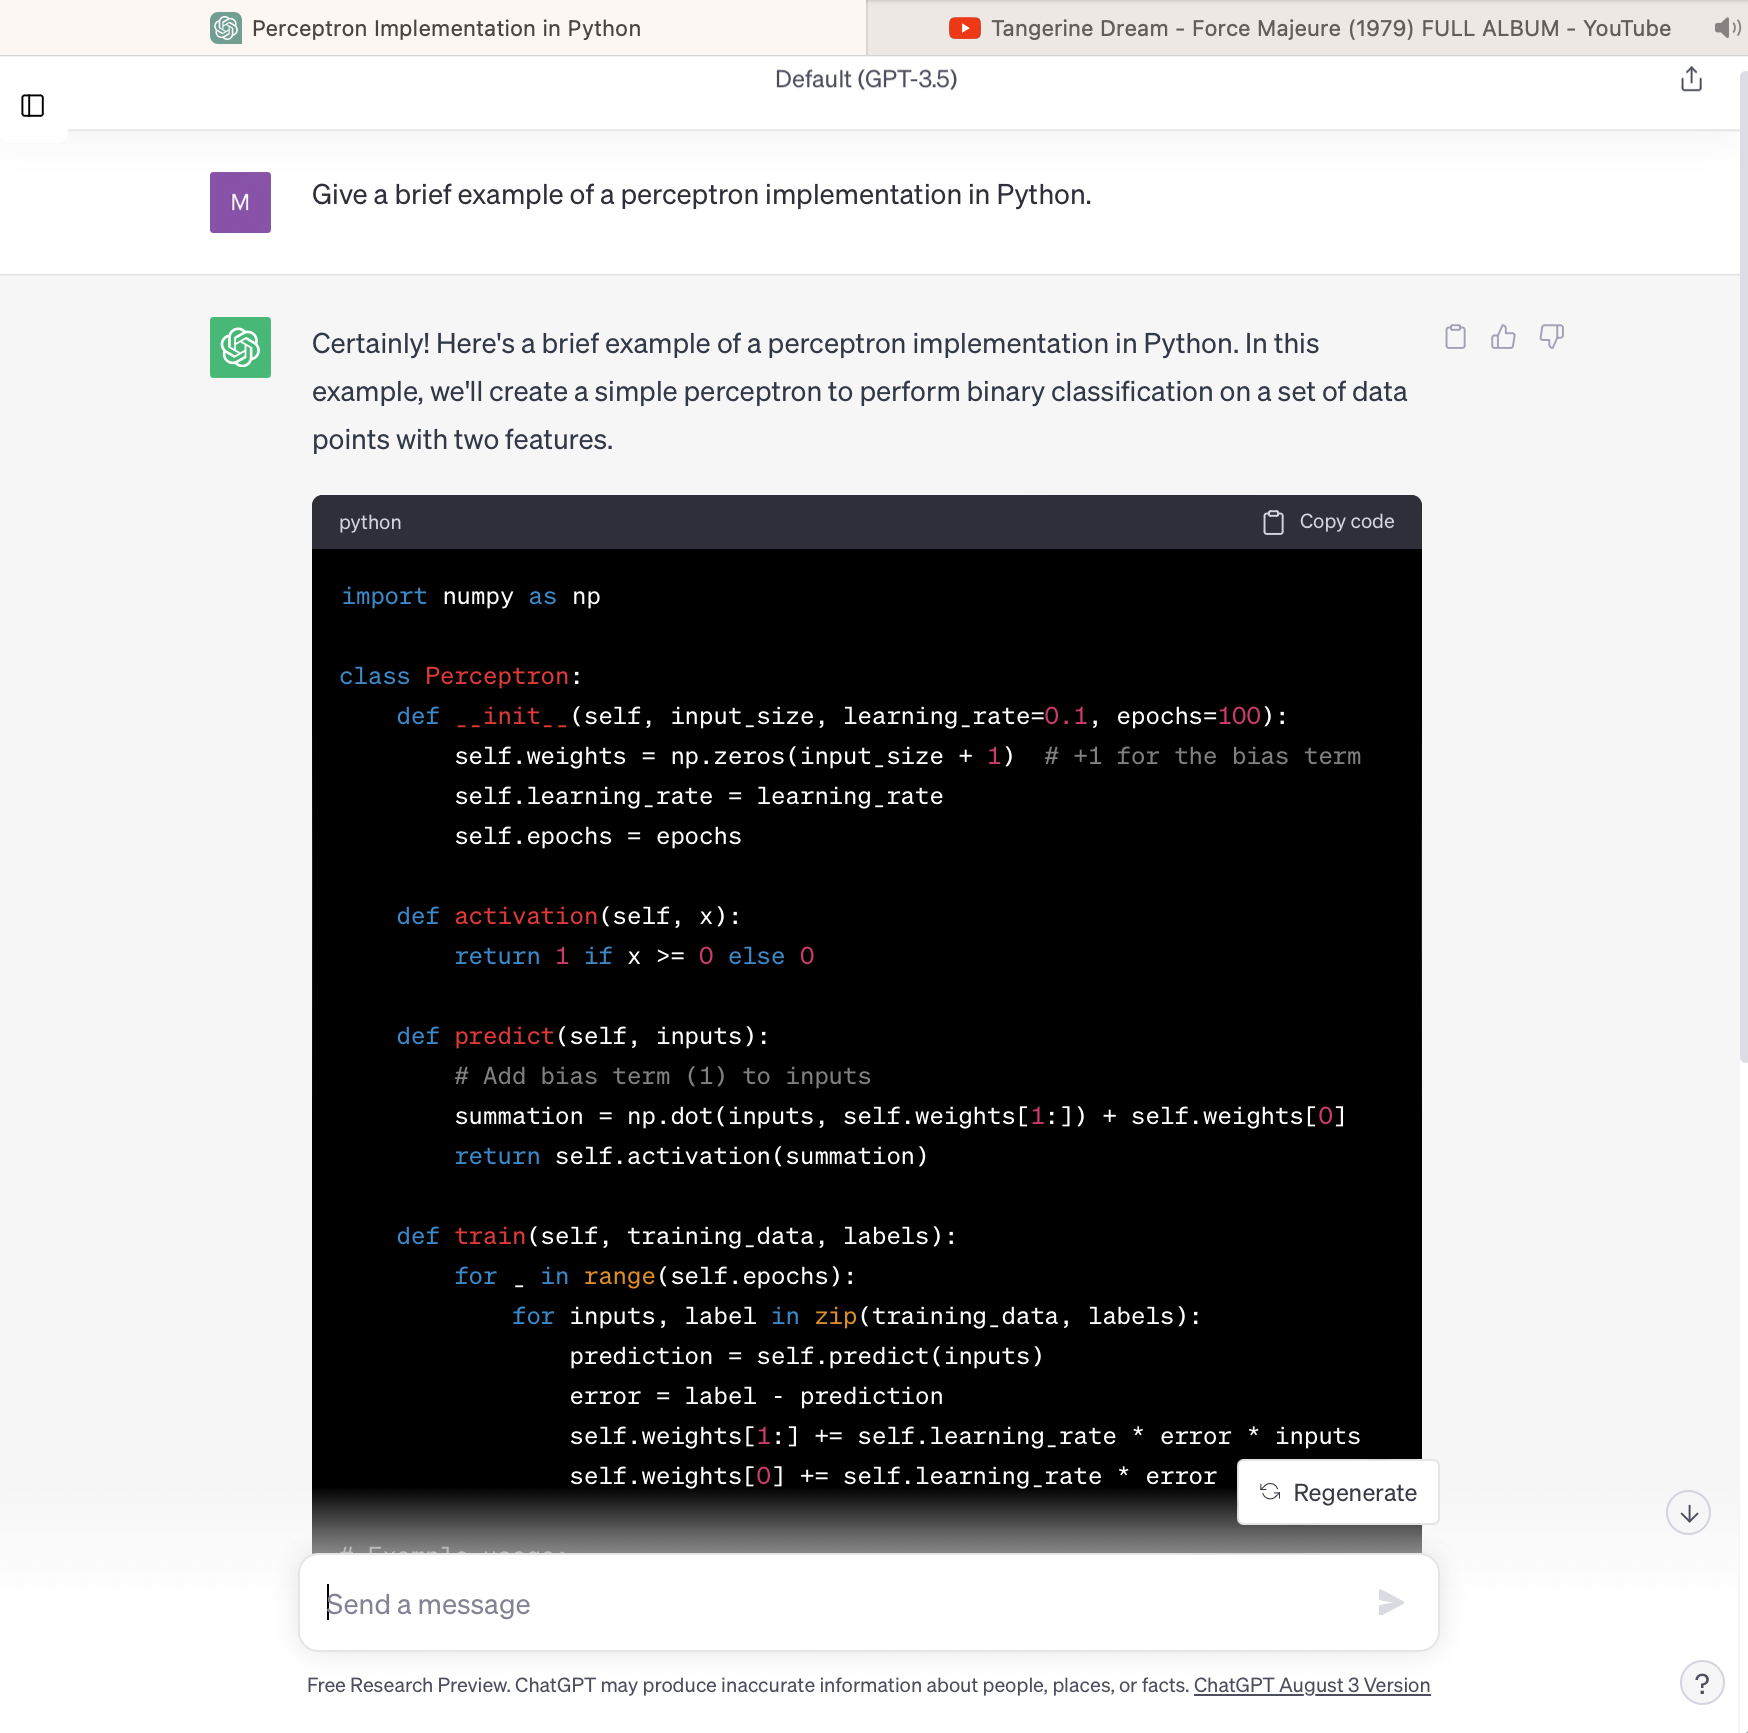

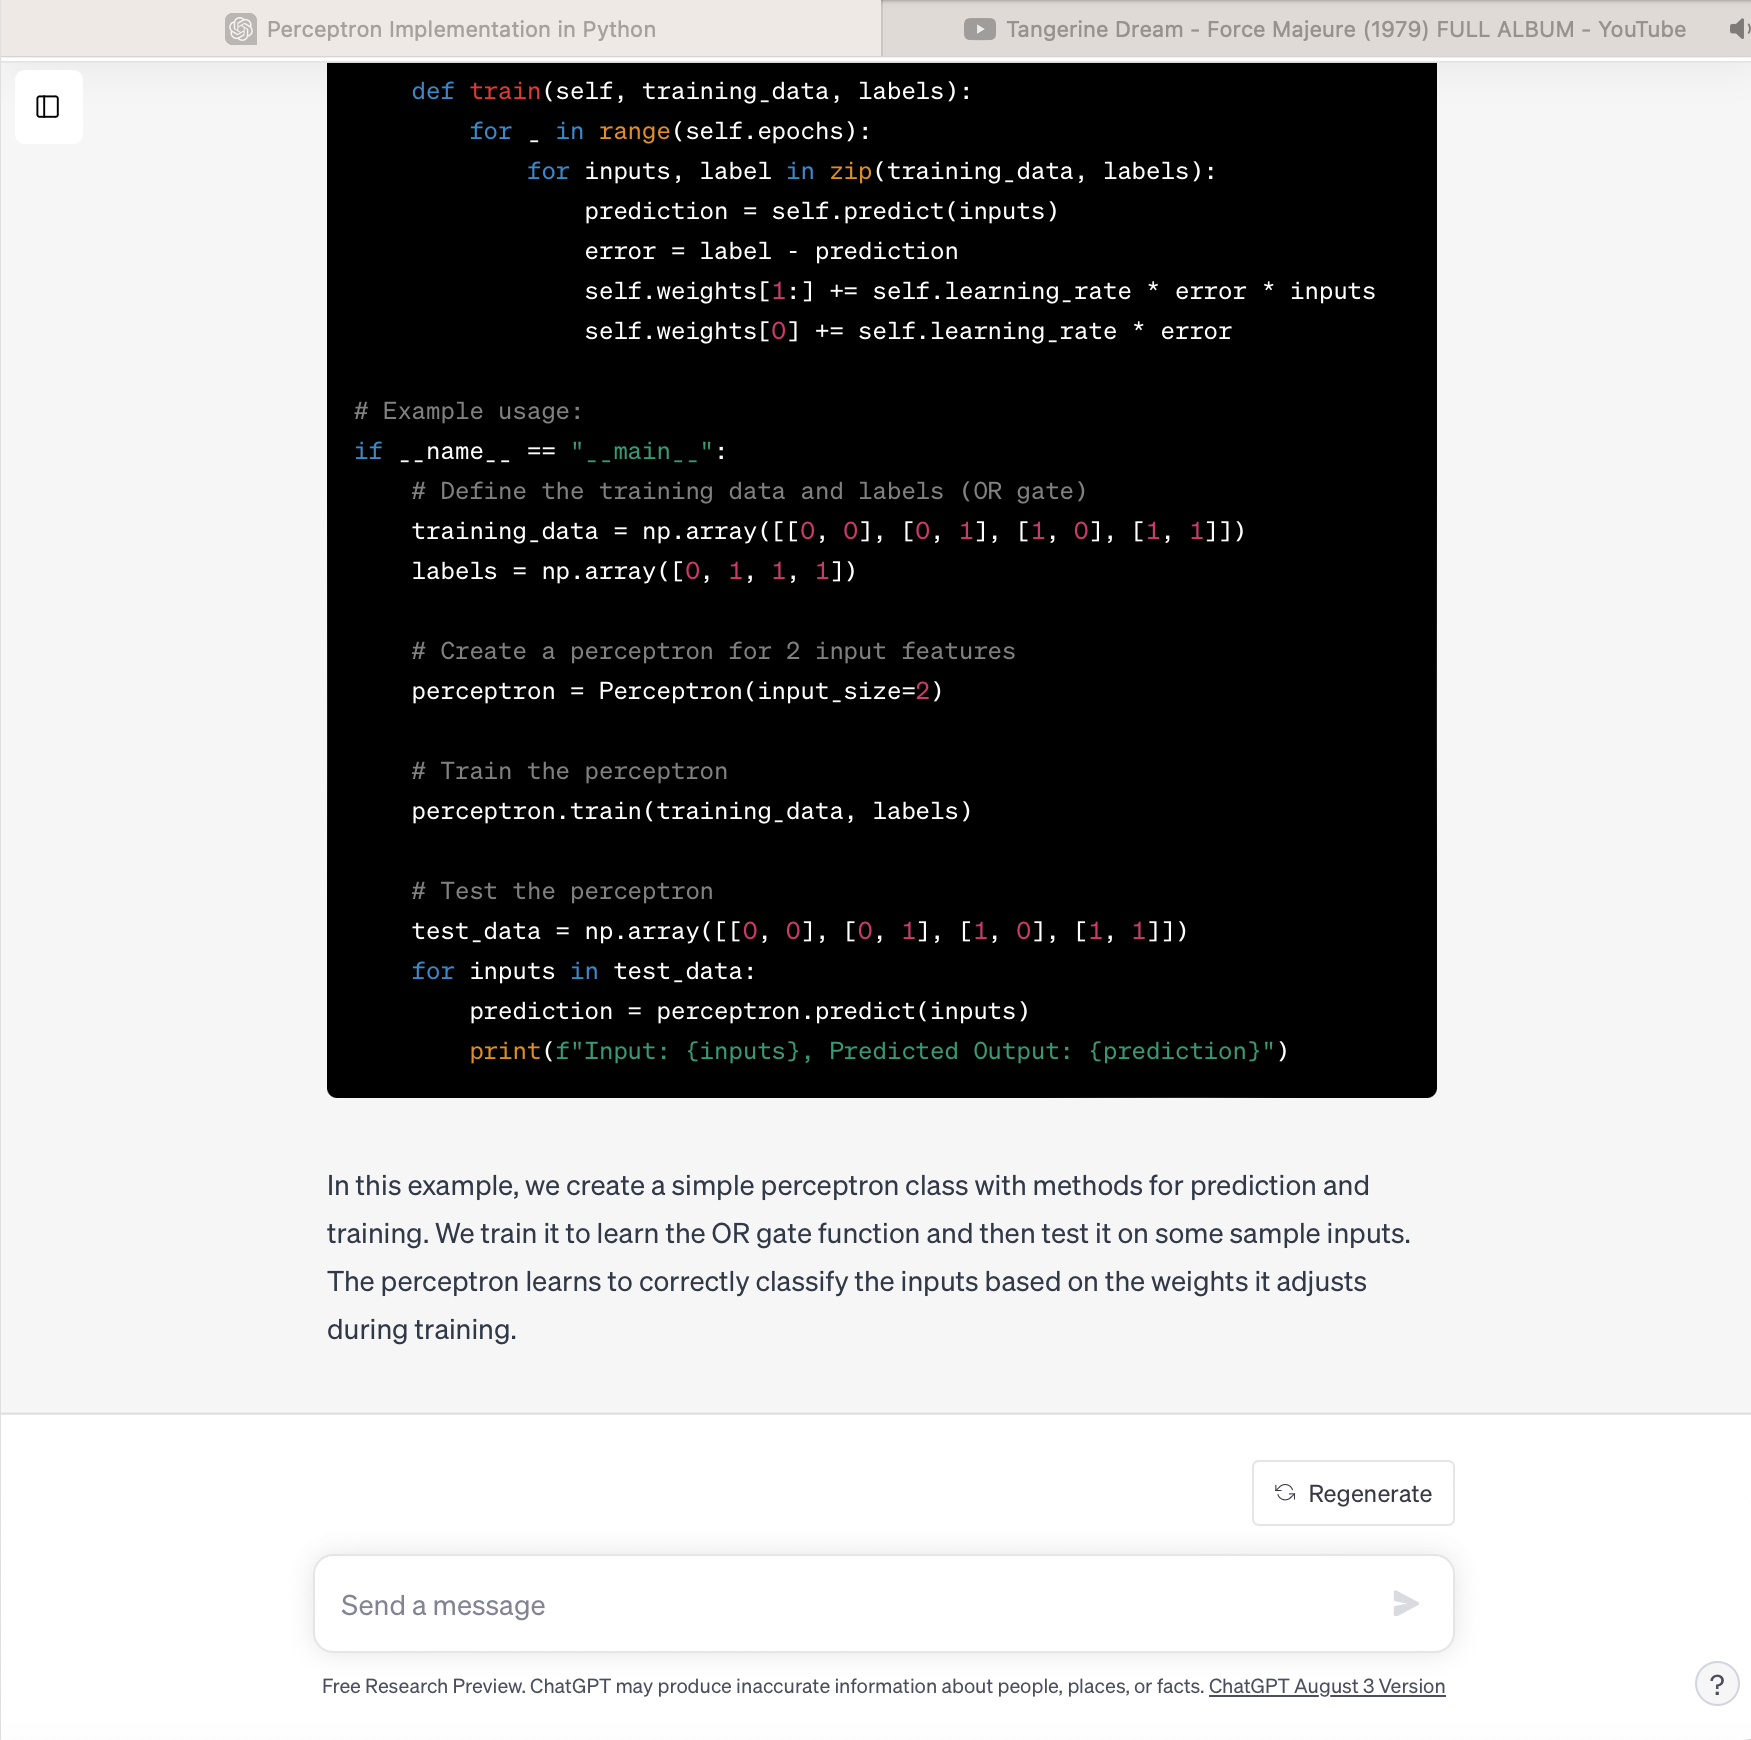

## Preparation Steps

In [1]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# ### Loading the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


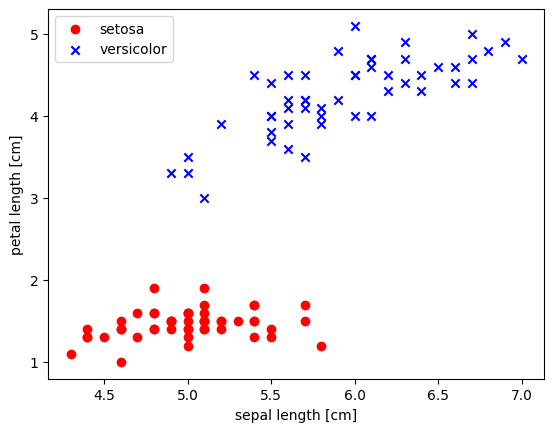

In [3]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

-----------------------
-----------------------
-----------------------



## <font color='#008DFF'> **Question 0: Manual Perceptron Training**

Below you can see 5 points of the data set, all labeled as 'setosa'.

In [6]:
X[5:10], y[5:10]

(array([[5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5]]),
 array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the perceptron are $w_0 = 5.0$, $w_1 = -0.1$, $w_2 = 4.5$. Here $w_0$ is the bias.

Write the weights after processing data points 5, 6, 7, and show all your calculations (with $\eta = 0.1$ and noting that $y,\hat{y}\in\{-1,1\}$):

Please give your answers in the cell below.

(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

Data point 5 [5.4, 1.7] <br>
z = w0 + w1x1 + w2x2 <br>
z = 5.0 + (-0.1)(5.4) + (4.5)(1.7) <br>
z = 12.11 <br>
y-hat = sign(12.11) = 1 <br>
update weights <br>
w0 = w0 + lr x (y-y-hat) x x0 <br>
w0 = 5.0 + 0.1x (-1 - 1) x 1 <br>
w0 = 4.8 <br>
 <br>
w1 = w1 + lr x (y - y-hat) x x1 <br>
w1 = -0.1 + 0.1 x (-1 - 1) x 5.4 <br>
w1 = -1.18 <br>

w2 = w2 + lr x (y - y-hat) x x2 <br>
w2 = 4.5 + lr x (y - y-hat) x 1.7 <br>
w2 = 4.16 <br>
 <br>
Data point 6 [4.6, 1.4] <br>
z = w0 + w1x1 + w2x2 <br>
z = 4.8 + (-1.18)(4.6)+(1.4) <br>
z = 5.196 <br>
y-hat = sign(5.196) = 1 <br>
update weights <br>
w0 = w0 + lr (y - y-hat) x x0 <br>
w0 = 4.8 + 0.1(-1 - 1) x 1 <br>
w0 = 4.6 <br>

w1 = w1 + lr (y - y-hat) x x1 <br>
w1 = -1.18 + 0.1 (-1 - 1) x 4.6 <br>
w1 = -2.1 <br>
 <br>
w2 = w2 + lr (y - y-hat) x x2 <br>
w2 = 4.16 + 0.1 (-1 - 1) x 1.4 <br>
w2 = 3.88 <br>

Data point 7 [5.0, 1.5] <br>
z = w0 + w1x1 + w2x2 <br>
z = 4.6 + (-2.1)(5) + 3.88(1.5) <br>
z = -0.08 <br>
y-hat = sign(-0.08) = -1 <br>
y-hat = y, no update needed <br>
final wieghts: w0 = 4.6, w1 = -2.1, w2 = 3.88 <br>



In [7]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0

maxScore = maxScore +4
# M[0,1] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 1: Perceptron Code Modification**

The following code is a perceptron implementation (with three do-nothing lines 59-61).

In [8]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        self.n_iter_ = 0
        ###(iv)keep track of historical weights
        self.w_historical_ = [self.w_.copy()]

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
              error = target - self.predict(xi)
              if error != 0:
                #(i)update = self.eta * (self.predict(xi) - target) only perform updates if y != y-hat
                update = self.eta * error
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                #(iv)keep track of historical weights
                self.w_historical_.append(self.w_.copy())
            self.errors_.append(errors)
            ### (iii)code to count number of training iterations
            self.n_iter_ += 1

            ##(ii) break out of loop if there are no more errors
            if errors == 0:
              break

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


There is a significant error in the above perceptron implementation. Work on the above cell and modify the code so that:

(i) The line containing the error is commented out, and a new line is added with corrected code.<br>
(ii) The fit function stops when no more iterations are necessary. <br>
(iii) The trained perceptron contains as an attribute not only its weights, but also the number of iterations it took for training. <br>
(iv) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed.

At each place where you have modified the code, please add clear comments surrounding it, similarly to the "do-nothing" code. Make sure you evaluate the cell again, so that following cells will be using the modified perceptron.


(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

In [9]:
# Grader's area

maxScore = maxScore +4
# M[1,1] =
# M[1,2] =
# M[1,3] =
# M[1,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 2: Experimenting with hyperparameters**

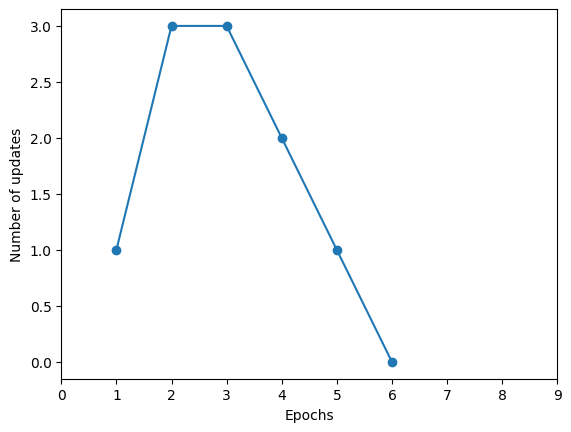

In [10]:

ppn = Perceptron(eta=0.01, n_iter=10, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xticks(range(0, 10, 1))  # Set integer x-axis labels
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()

Running the above code, you can verify whether your modification in Question 1 works correctly. The point of this question is to experiment with the hyperparameter $\eta$, the learning rate. Here are some specific questions:
<br>

(i) Find values of $\eta$ for which the process requires 10, 20, 30, and 40 iterations to converge. <br>
(ii) Is it always the case that raising $\eta$ leads to a reduced (or equal) number of iterations? Explain with examples. <br>
(iii) Find two different settings for the random state, that give different convergence patterns for the same value of $\eta$. <br>
(iv) Based on your experiences in parts (i)-(iii), would **binary search** be an appropriate strategy for determining values of $\eta$ for which the perceptron converges within a desired number of iterations?

Please give your answers in the cell below.

<br>(Double click here to type your answer.)
<br>(i) for 10 iterations eta = 0.0003, 20 iterations eta = 0.0000499, 30 iterations eta = 0.00002, 40 iterations = 0.00001
<br>(ii) For this specific example, I'm seeing that as the learning rate is increased the number of iterations is reduced until we hit 6. But this will not always be the case, and with different datasets we might see the trend of an increase to the iterations with an increase to the learning rate.
<br>(iii) With eta = 0.001, for random state = 3 I get a convergence at 6 epochs, but with a random state = 2 I see a convergence at 7.
<br>(iv) I think for this specific example binary search might be a viable approach to optimizing the learning rate. However, in general I think it would be an ineffective strategy, as the relationship between the learning rate and the number of iterations to convergence is not always linear.

(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

In [11]:
# Grader's area

maxScore = maxScore +4
# M[2,1] =
# M[2,2] =
# M[2,3] =
# M[2,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 3: Visualizing multiple decision regions over time**

Here is the function for visualizing decision regions.

In [12]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'o', 'P', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

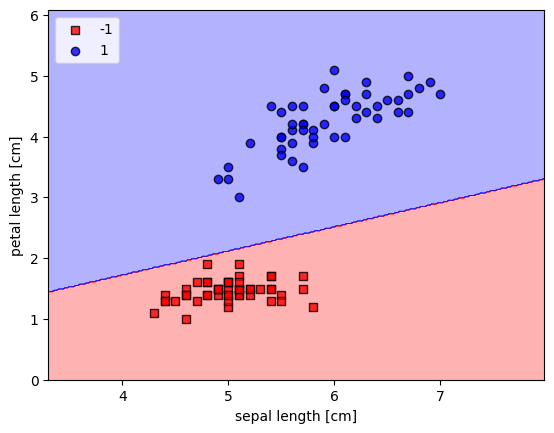

In [13]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

Using the above, give code that plots the decision regions for the first 10 epochs. Use learning rate = 0.01 and random seed = 1 when applicable.

(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

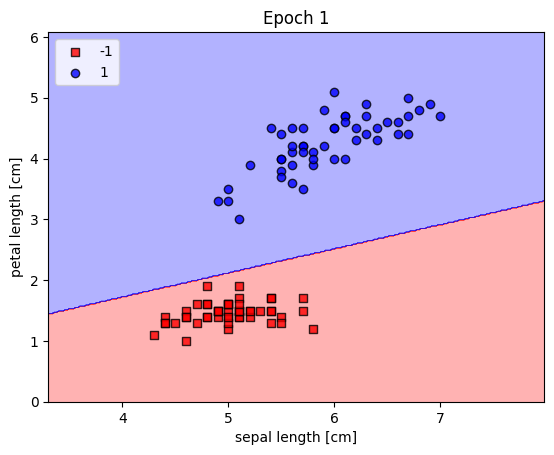

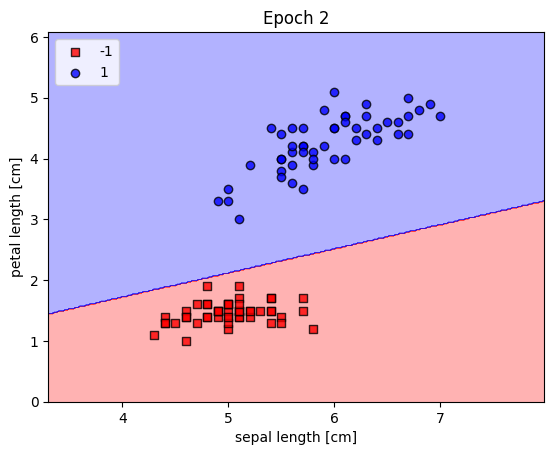

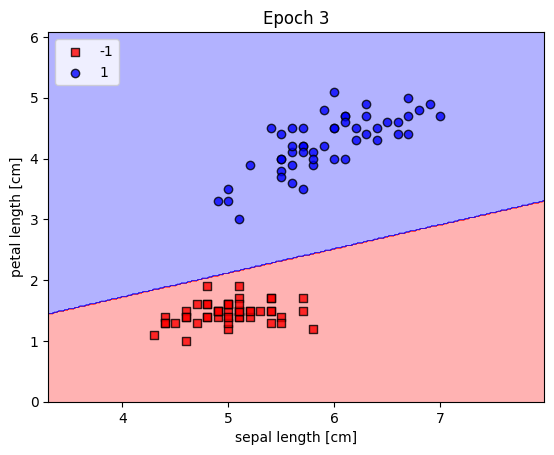

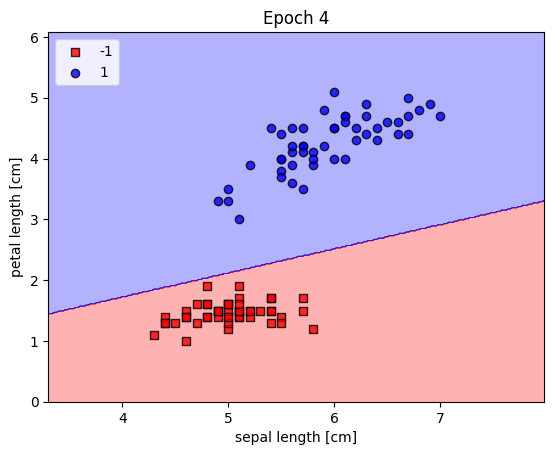

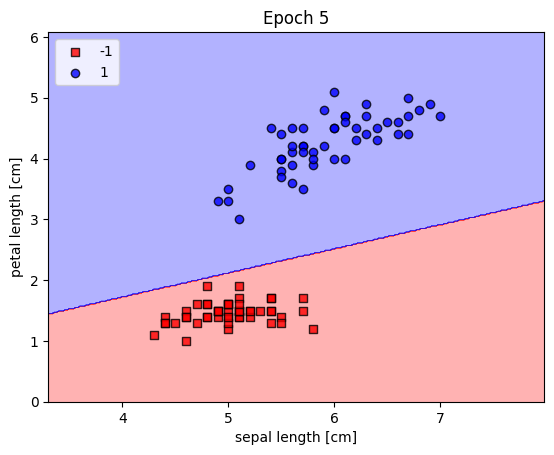

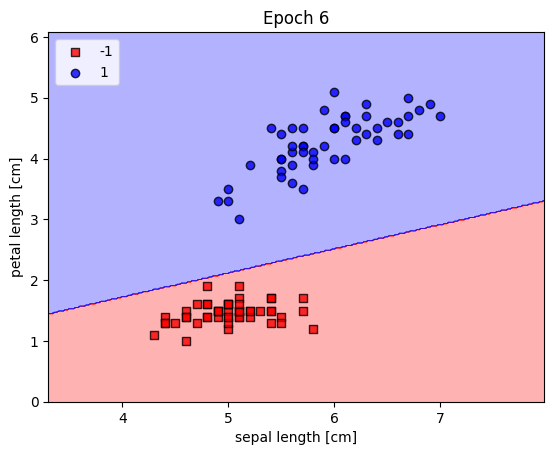

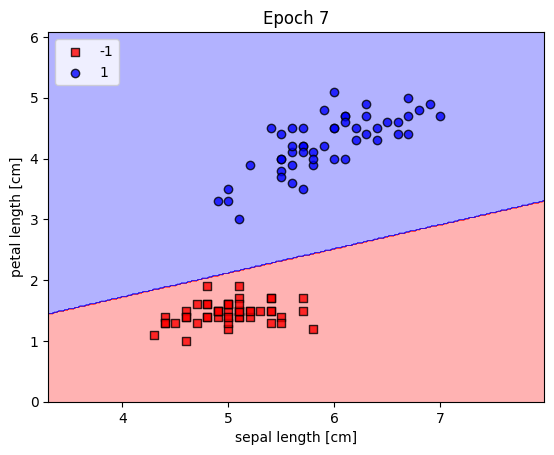

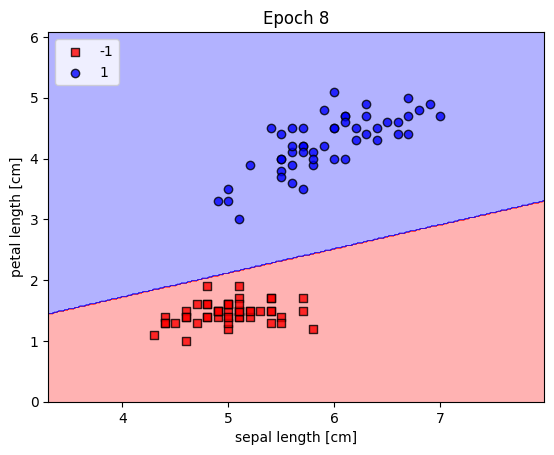

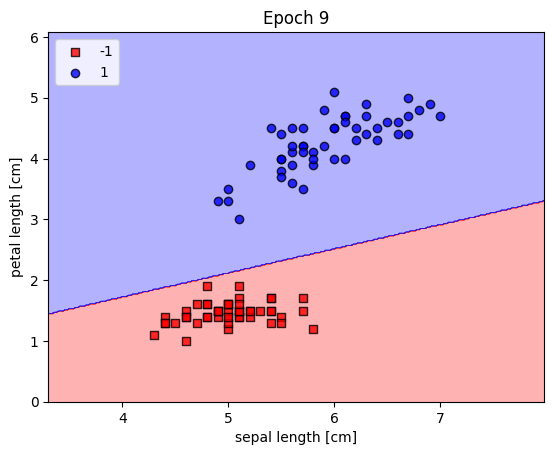

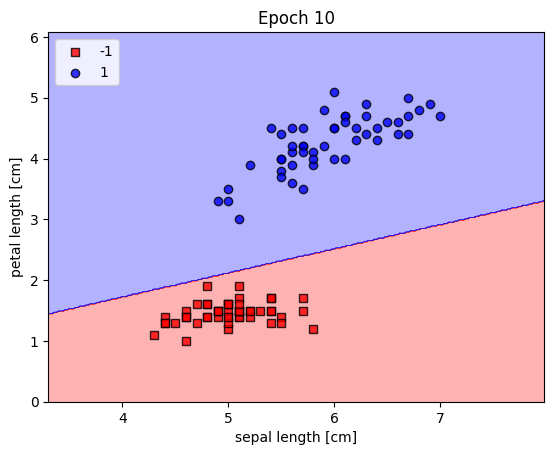

In [14]:
for epoch in range(10):  # For the first 10 epochs
    # Train your classifier here for one epoch. The method to do this depends on your classifier.
    # This might be classifier.partial_fit(X_train, y_train) or a similar approach.

    plot_decision_regions(X, y, classifier=ppn)
    plt.title(f'Epoch {epoch+1}')
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()

In [15]:
# Grader's area

maxScore = maxScore +4
# M[3,1] =


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 4: Changing the data order in training**



The data arrays (X, y) currently in the memory are organized so that all data points with a given label (e.g. 'Setosa') lie in a contiguous part of the arrays (X, y). In this question we will check the impact of changing the order of the data on the number of iterations required to learn a correct perceptron.


The commented code below needs a small change in order to generate a random shuffle (permutation) of the data. Please look up the particular functions of the code, see how they work, and then do the required modification and uncomment / evaluate the code.

In [16]:
# Establish a random shuffle
s = np.arange(len(X))
np.random.shuffle(s)

# Shuffle sample
X_shuffle = X[s]
y_shuffle = y[s]


Modify the code below as follows: <br>
(i) Pick a sufficiently small value of $\eta$, so that convergence takes 20 iterations or more. <br>
(ii) Add an extra line that fits the perceptron on the shuffled data. <br>
(iii) Plot the error for both training processes (the original data and the shuffled data). <br>
(iv) What do you observe?

(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

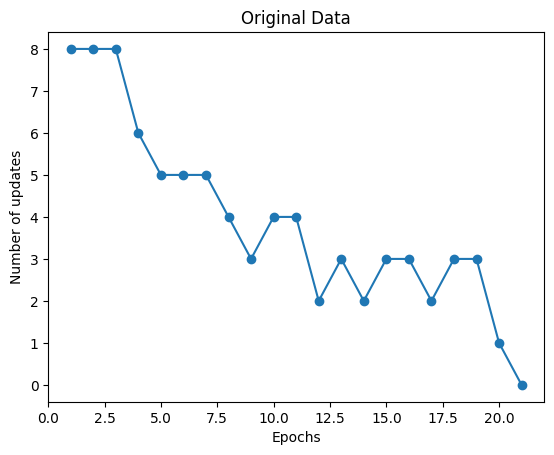

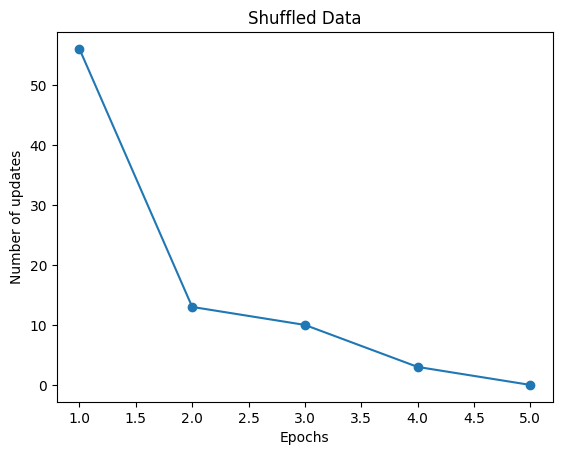

In [17]:
#Original data
ppn = Perceptron(eta=0.00005, n_iter=30, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
y_pred_original = ppn.predict(X)
error_original = np.mean(y_pred_original != y)
plt.title("Original Data")
plt.show()
#Shuffled Data
ppn_shuffled = Perceptron(eta=0.00005, n_iter=30, random_state=1)

ppn_shuffled.fit(X_shuffle, y_shuffle)

plt.plot(range(1, len(ppn_shuffled.errors_) + 1), ppn_shuffled.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title("Shuffled Data")
y_pred_shuffled = ppn_shuffled.predict(X_shuffle)
error_shuffled = np.mean(y_pred_shuffled != y_shuffle)
plt.show()

# plt.savefig('images/02_07.png', dpi=300)


Give your answers here.

<br>(i) I set eta = 0.00005 and I'm seeing convergence occur at around 25 epochs.
<br>(ii) organized code to calculate the fit for the organized data and the shuffled data, and added comments to denote each section.
<br>(iii)Added plot for shuffled data
<br>(iv) With all the parameters being the same,(learning rate, the random state, and the number of iterations), the number of iterations unitl convergence is reached are very different between the orignal plot and the error plot. To me this is an indicator of how the performance of percepton is linked to the specific data that it's being performed on. That's why it's important to optimize the learning rate based on the data it's being used on, and there is no one size fits all solution for optimizing the learning rate.

In [18]:
# Grader's area

maxScore = maxScore +4
# M[4,1] =
# M[4,2] =
# M[4,3] =
# M[4,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 5: Understanding linear transformations**

Suppose that we have a 2-dimensional data set $X$. We transform each data point $X_j = (X_{j,1}, X_{j,2})$ as follows: $\tilde{X_j} = ( a X_{j,1} - c, b X_{j,2}-c)$, where $a$, $b$, $c$ are constant values. This is a linear transformation, because our transformed data comes from simple operations that use 'first powers' of the original data.

If our given data set is linearly separable, does the same hold true for the transformed set? In the following cells you can plot a transformed version of the Iris dataset, so that you see how it behaves (for your choice of $a$, $b$, $c$.) But you should also try and justify your answer in a theoretical way: if there exists a  'good' perceptron for the original data set, what would be the weights for the perceptron that works on the transformed set? Are there any issues that might arise?

(1) Give your own answer to the above question.

(2) What happens when you use ChatGPT to answer the question? Was ChatGPT helpful in resolving it?

(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

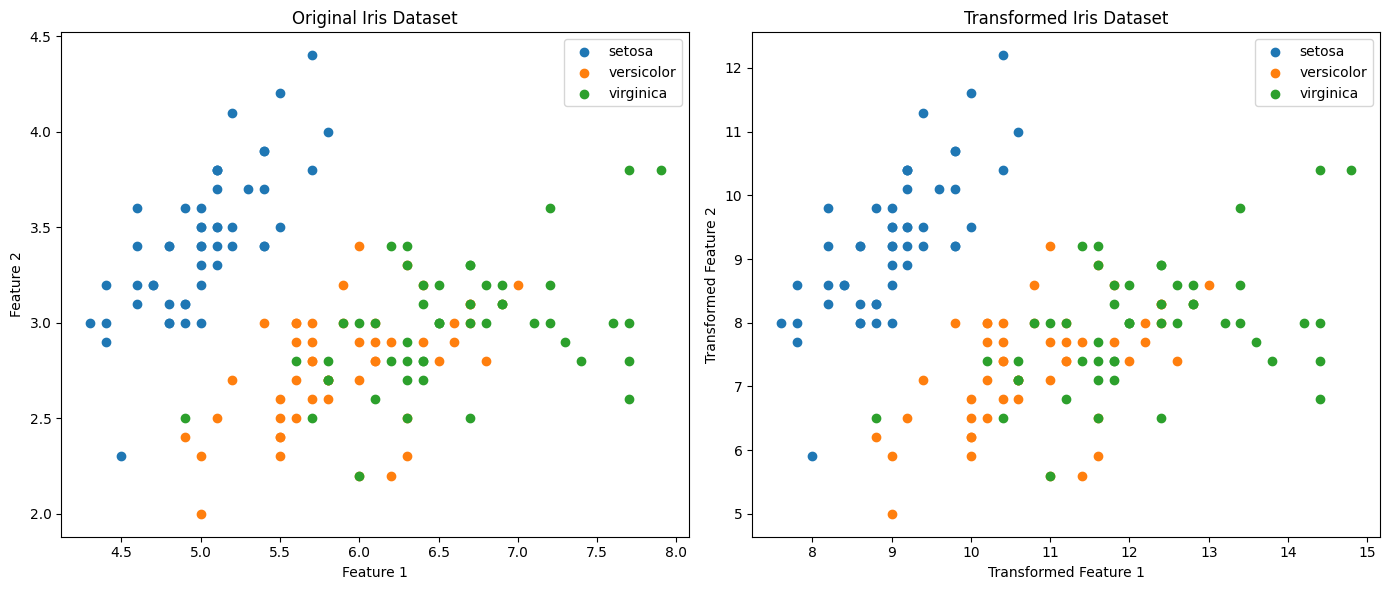

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

a, b, c = 2, 3, 1
X_transformed = np.array([(a*x[0] - c, b*x[1] - c) for x in X])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for i, label in enumerate(np.unique(y)):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=iris.target_names[label])
plt.title('Original Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
for i, label in enumerate(np.unique(y)):
    plt.scatter(X_transformed[y == label, 0], X_transformed[y == label, 1], label=iris.target_names[label])
plt.title('Transformed Iris Dataset')
plt.xlabel('Transformed Feature 1')
plt.ylabel('Transformed Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

(i)If a good percepetron exists for the original dataset, then there should exist a good perception for the transformed dataset as well. The key to finding the appropriate weights is to scale the weights in revese of the constants a, b, and c.
This will help to counteract for the transformation of the original data introduced by those contsants. One issue that could arise, is the margins between the classes could change. Depending on the values chosen for a,b, and c, the boundraies between classes could be different then the original dataset.

(ii)

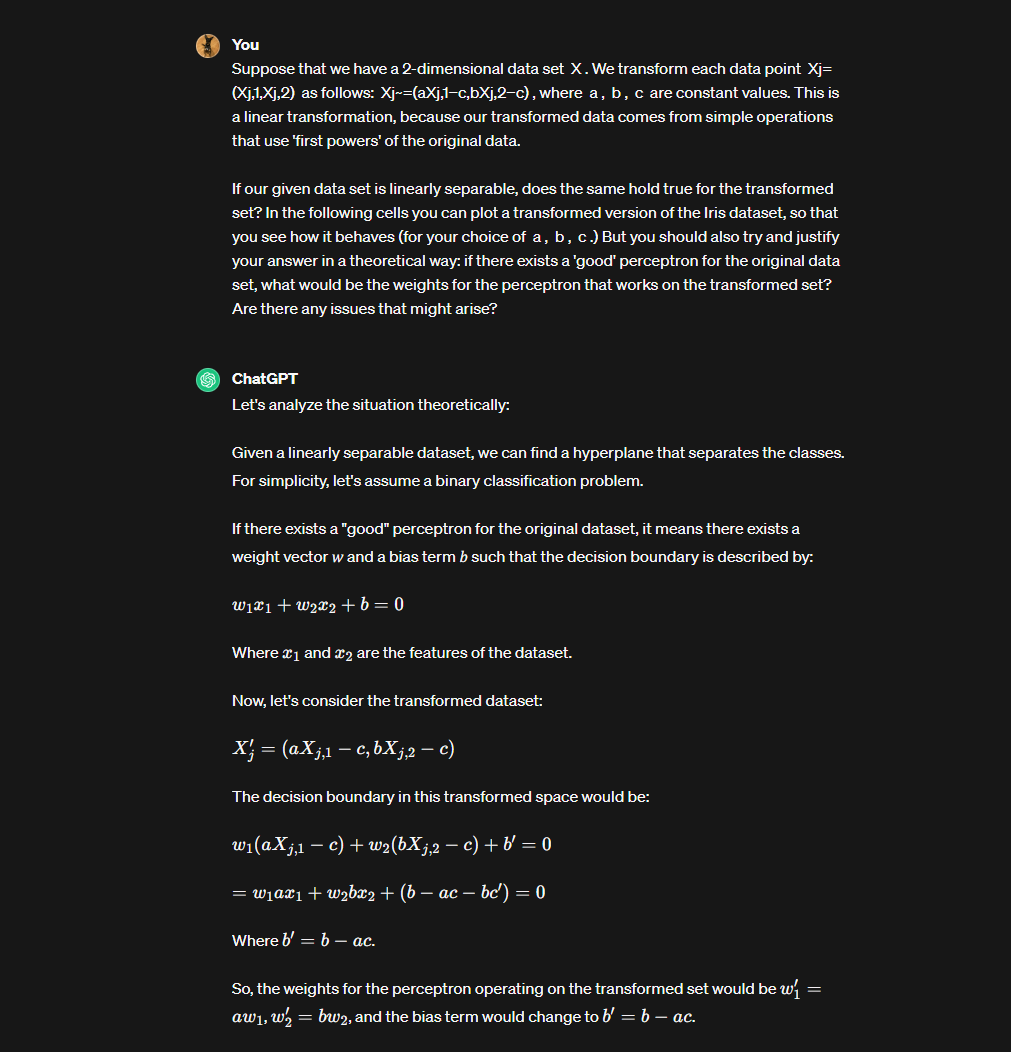

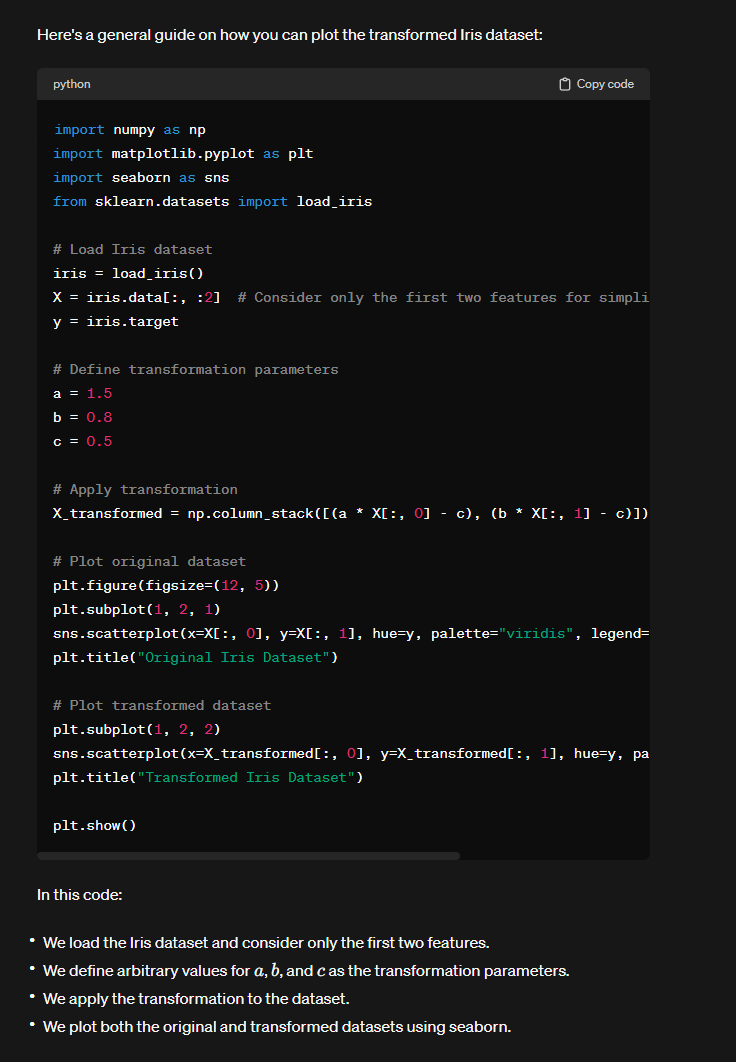

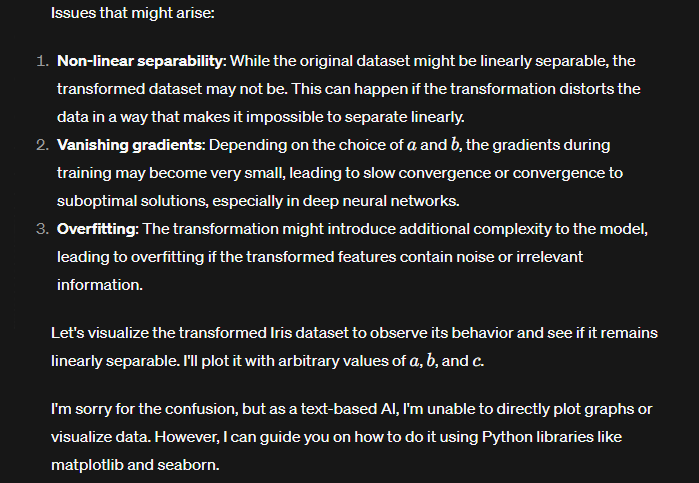

In [23]:
# Grader's area

maxScore = maxScore +4
# M[5,1] =


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 6: Linear regression with numpy 1-liners**

(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

In [24]:
# here we initialize a random data matrix X and random numerical labels y
import numpy as np

X = np.random.randn(10,3)
y = np.random.randn(10,1)

# we also initialize a hypothetical hyperplane defined by w and b
w = np.random.randn(1,3)
b = -1


In [25]:
# (i) find the numerical labels predicted by the model (w,b) for the points in X
#     your code should be a single numpy line
#     hint: we wrote this equation for a single point x in class
#           try to generalize it by expressing everying in terms of matrices

# your code goes here

y_predicted = X @ w.T + b


In [28]:
# (ii) find the updated weights after one application of gradient descent with lr = 0.1
#      your code should be a single numpy line

y_ = np.random.randn(10,1)
w -= 0.1 * (2 / X.shape[0] * X.T @ (X @ w.T - y)).T





In [29]:
# Grader's area

maxScore = maxScore +4
# M[6,1] =

maxScore = maxScore +4
# M[6,2] =


-----------------------
-----------------------
-----------------------


In [ ]:
#Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore